## Tensorflow Benchmark: 
****
**Dataset:** MNIST (https://www.cs.toronto.edu/~kriz/cifar.html)
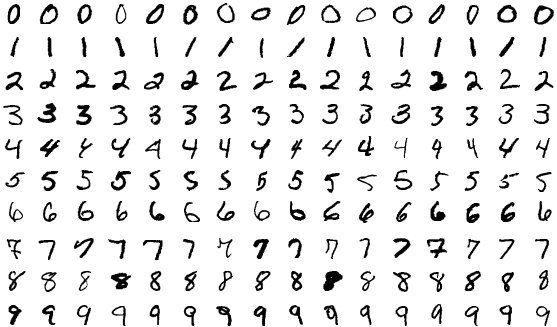\
**Model:** LeNet-5
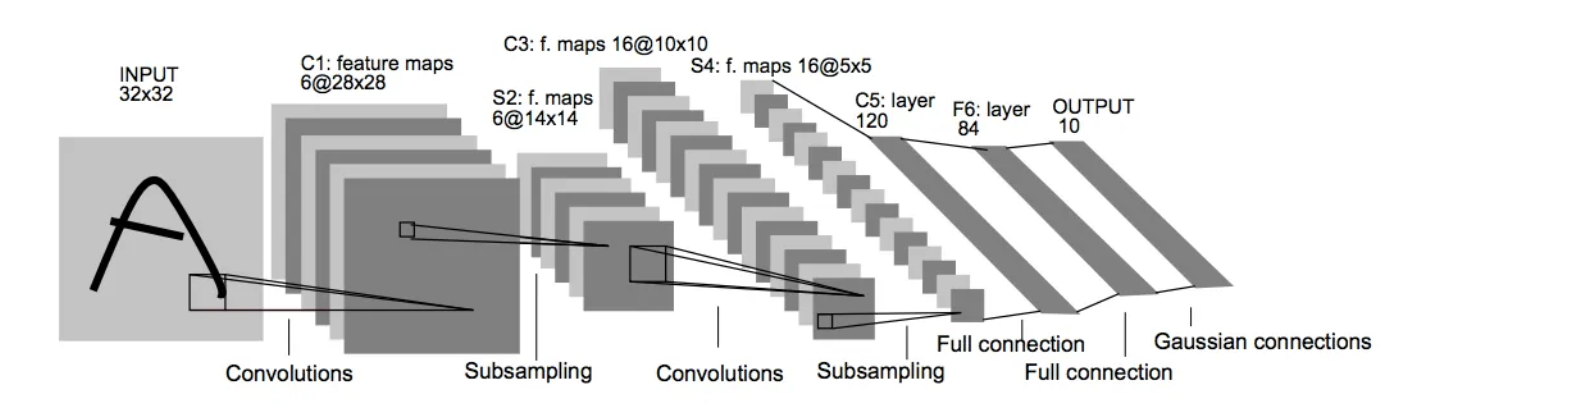

*Training completed in 55s.*

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.config.list_physical_devices('GPU')

TensorFlow version: 2.15.0
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
(ds_train, ds_test), info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

2023-12-22 03:06:53.617684: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-22 03:06:53.617703: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-22 03:06:53.617709: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-22 03:06:53.617740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-22 03:06:53.617759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
from tensorflow.keras import layers

In [4]:
input_shape = (28, 28, 1)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(120, activation="relu"),
        layers.Dense(84, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ],
    name = "LeNet-5"
)

model.summary()

Model: "LeNet-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d (Average  (None, 13, 13, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0   

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [6]:
%%time
history = model.fit(ds_train.batch(64), epochs=5)

Epoch 1/5


2023-12-22 03:06:54.411308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 11s 11ms/step - loss: 3.0977 - accuracy: 0.8324
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 39.0598 - accuracy: 0.8812
Epoch 3/5
938/938 [==============================] - 11s 11ms/step - loss: 34593.0078 - accuracy: 0.7768
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 591694.5625 - accuracy: 0.7276
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 2361145.5000 - accuracy: 0.7279
CPU times: user 43.5 s, sys: 17.6 s, total: 1min 1s
Wall time: 55 s


GPU being utilised: \
<img src = "gpu-tf.png" width = 200px align = "left">

## PyTorch Benchmark: 
****
*Training completed in 1min 28s.*

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [8]:
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 5

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

In [9]:
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [10]:
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(576, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [11]:
model = LeNet5(num_classes).to(device)

cost = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_step = len(train_loader)

In [12]:
%%time
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = cost(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 312 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [312/938], Loss: 0.0981
Epoch [1/5], Step [624/938], Loss: 0.1068
Epoch [1/5], Step [936/938], Loss: 0.0215
Epoch [2/5], Step [312/938], Loss: 0.0975
Epoch [2/5], Step [624/938], Loss: 0.0392
Epoch [2/5], Step [936/938], Loss: 0.2028
Epoch [3/5], Step [312/938], Loss: 0.0070
Epoch [3/5], Step [624/938], Loss: 0.0745
Epoch [3/5], Step [936/938], Loss: 0.0392
Epoch [4/5], Step [312/938], Loss: 0.0252
Epoch [4/5], Step [624/938], Loss: 0.0063
Epoch [4/5], Step [936/938], Loss: 0.0870
Epoch [5/5], Step [312/938], Loss: 0.0535
Epoch [5/5], Step [624/938], Loss: 0.0220
Epoch [5/5], Step [936/938], Loss: 0.0022
CPU times: user 1min 16s, sys: 13.1 s, total: 1min 29s
Wall time: 1min 28s


In [13]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 99.12 %


GPU is utilised. \
<img src = "gpu-torch.png" width = 200px align = "left">